In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\User\Desktop\Machine Learning Project\Biodiesel-Yield-Using-ANN-main\Xantham_gum_data.xlsx")
data.head()

,X1,X2,X3,Observed
0,1,2,7.5,7.22
1,3,2,7.5,7.52
2,1,6,7.5,4.58
3,3,6,7.5,6.45
4,1,4,0.0,4.47


In [3]:
data.describe()

,X1,X2,X3,Observed
count,17.000000,17.000000,17.000000,17.000000
mean,2.000000,4.000000,7.500000,6.289412
std,0.707107,1.414214,5.303301,1.100945
min,1.000000,2.000000,0.000000,4.470000
25%,2.000000,4.000000,7.500000,5.810000
50%,2.000000,4.000000,7.500000,6.280000
75%,2.000000,4.000000,7.500000,6.930000
max,3.000000,6.000000,15.000000,8.310000


In [4]:
def get_preds(y_test, y_preds):
    y_test=pd.DataFrame(y_test)
    y_test.rename(columns={0:'Actual'}, inplace=True)
    y_preds=pd.DataFrame(y_preds)
    y_preds.rename(columns={0:'Predicted'}, inplace=True)
    predictions=pd.concat([y_test, y_preds], axis=1)
    return predictions    

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [6]:
target="Observed"
X=data.drop(columns=[target])
y=data[target]

In [7]:
y

0     7.22
1     7.52
2     4.58
3     6.45
4     4.47
5     5.67
6     6.46
7     7.76
8     6.65
9     4.52
10    8.31
11    6.93
12    5.81
13    6.21
14    6.28
15    6.22
16    5.86
Name: Observed, dtype: float64

In [8]:
X1=X.values
y1=y.values.reshape(-1,1)
X_train, X_test, y_train, y_test= train_test_split(X1, y1, test_size=0.3, random_state=100)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
x_df=sc.transform(X1)
sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)
y_df=sc_y.transform(y1)

In [9]:
k=["rbf", "linear", "poly", "sigmoid"]
c=range(100,1000,100)
g= np.logspace(-10, 0, 10)
epsilon=np.logspace(-3, 0, 10)
param_grid=dict(kernel=k,C=c, gamma=g,epsilon=epsilon)
print(param_grid)

{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': range(100, 1000, 100), 'gamma': array([1.00000000e-10, 1.29154967e-09, 1.66810054e-08, 2.15443469e-07,
       2.78255940e-06, 3.59381366e-05, 4.64158883e-04, 5.99484250e-03,
       7.74263683e-02, 1.00000000e+00]), 'epsilon': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])}


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score, mean_absolute_error

In [19]:
import warnings
warnings.filterwarnings(action="ignore")
svr=SVR()
scorer=make_scorer(r2_score,greater_is_better=True)
grid=GridSearchCV(svr, param_grid, cv=3, scoring=scorer,verbose=True)
grid.fit(X_train, y_train.ravel())
svr_params=grid.best_params_
svr_params

Fitting 3 folds for each of 3600 candidates, totalling 10800 fits


{'C': 700, 'epsilon': 0.001, 'gamma': 0.005994842503189421, 'kernel': 'rbf'}

In [20]:
best_svr=grid.best_estimator_
best_svr

SVR(C=700, epsilon=0.001, gamma=0.005994842503189421)

In [63]:
import time
start_time=time.time()
best_svr.fit(X_train, y_train.ravel())
y_preds=best_svr.predict(X_test)
elapsed_time=time.time()-start_time
print(f'executed in {elapsed_time} seconds or {elapsed_time*1000} milliseconds')
y_preds

executed in 0.006383419036865234 seconds or 6.383419036865234 milliseconds


array([-0.08706865, -1.82777654,  0.33782642,  1.33716669, -0.08706865,
        0.18572339])

In [22]:
y_test1 = sc_y.inverse_transform(y_test)
pred1 = sc_y.inverse_transform(y_preds.reshape(-1,1))
svr_predictions=get_preds(y_test1, pred1)
svr_predictions

,Actual,Predicted
0,6.28,6.210603
1,4.52,4.241602
2,6.93,6.691223
3,7.52,7.821626
4,5.81,6.210603
5,6.46,6.519172


In [23]:
corr_test=svr_predictions["Actual"].corr(svr_predictions["Predicted"])
corr_test

0.9749277890397124

In [24]:
print("Mean absolute error :", mean_absolute_error(y_test,y_preds))
print("Mean squared error :",mean_squared_error(y_test,y_preds))
print("Root Mean squared error :",sqrt(mean_squared_error(y_test,y_preds)))
print("R2 Score :",r2_score(y_preds,y_test))

Mean absolute error : 0.1986139886833891
Mean squared error : 0.05136101568166309
Root Mean squared error : 0.22662968843834888
R2 Score : 0.9417371786261469


In [25]:
pred=best_svr.predict(X_train)

In [26]:
y_train1 = sc_y.inverse_transform(y_train)
pred_train = sc_y.inverse_transform(pred.reshape(-1,1))
svr_prediction_train=get_preds(y_train1, pred_train)
svr_prediction_train

,Actual,Predicted
0,6.22,6.210603
1,5.67,5.671399
2,4.58,4.581571
3,4.47,4.471303
4,8.31,8.308191
5,7.22,7.219248
6,6.21,6.210603
7,7.76,7.761309
8,6.45,6.448651
9,5.86,6.210603


In [27]:
r2_score(svr_prediction_train["Predicted"],svr_prediction_train["Actual"])

0.9911207847426418

In [28]:
corr_train=svr_prediction_train["Actual"].corr(svr_prediction_train["Predicted"])
corr_train

0.9960072390374254

In [29]:
print("Mean absolute error :", mean_absolute_error(y_train,pred))
print("Mean squared error :",mean_squared_error(y_train,pred))
print("Root Mean squared error :",sqrt(mean_squared_error(y_train,pred)))

Mean absolute error : 0.02983712480722643
Mean squared error : 0.008741071984097022
Root Mean squared error : 0.09349370023748671


In [30]:
pred_df=best_svr.predict(x_df)

In [31]:
r2_score(y_df,pred_df)

0.9733245730331834

In [32]:
y_df1 = sc_y.inverse_transform(y_df)
pred_df1 = sc_y.inverse_transform(pred_df.reshape(-1,1))
svr_prediction_df=get_preds(y_df1, pred_df1)
svr_prediction_df

,Actual,Predicted
0,7.22,7.219248
1,7.52,7.821626
2,4.58,4.581571
3,6.45,6.448651
4,4.47,4.471303
5,5.67,5.671399
6,6.46,6.519172
7,7.76,7.761309
8,6.65,6.648843
9,4.52,4.241602


In [33]:
print("Mean absolute error :", mean_absolute_error(y_df1,pred_df1))
print("Mean squared error :",mean_squared_error(y_df1,pred_df1))
print("Root Mean squared error :",sqrt(mean_squared_error(y_df1,pred_df1)))
print("R2 Score :",r2_score(y_df1,pred_df1))

Mean absolute error : 0.10113090640443759
Mean squared error : 0.030430847110663965
Root Mean squared error : 0.17444439546934137
R2 Score : 0.9733245730331834


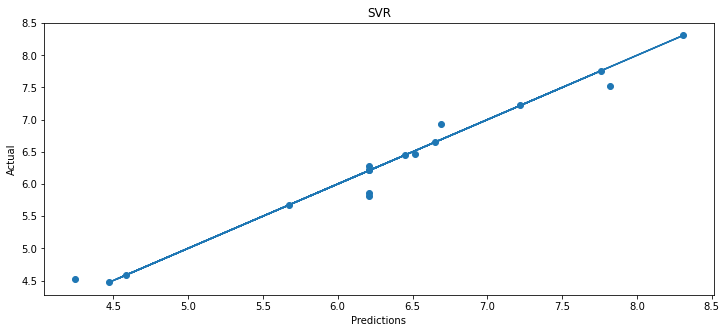

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(y_df1, y_df1)
plt.scatter(pred_df1, y_df1)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("SVR");

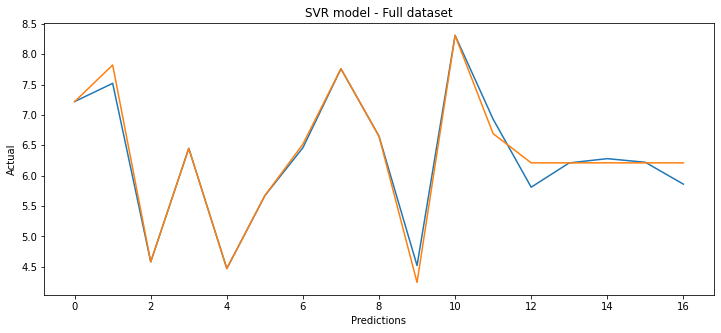

In [35]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(y_df1)
plt.plot(pred_df1)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("SVR model - Full dataset");

In [36]:
c=range(0,1100,100)
g= np.logspace(-6, 0, 10)
epsilon=np.logspace(-3, 0, 9)
param_grid=dict(C=c, gamma=g,epsilon=epsilon)
print(param_grid)

{'C': range(0, 1100, 100), 'gamma': array([1.00000000e-06, 4.64158883e-06, 2.15443469e-05, 1.00000000e-04,
       4.64158883e-04, 2.15443469e-03, 1.00000000e-02, 4.64158883e-02,
       2.15443469e-01, 1.00000000e+00]), 'epsilon': array([0.001     , 0.00237137, 0.00562341, 0.01333521, 0.03162278,
       0.07498942, 0.17782794, 0.4216965 , 1.        ])}


In [37]:
import warnings
warnings.filterwarnings(action="ignore")
svr_poly=SVR(kernel="poly")
scorer=make_scorer(r2_score,greater_is_better=True)
grid_poly=GridSearchCV(svr_poly, param_grid, cv=3, scoring=scorer,verbose=True)
grid_poly.fit(X_train, y_train.ravel())
svr_params_poly=grid_poly.best_params_
svr_params_poly

Fitting 3 folds for each of 990 candidates, totalling 2970 fits


{'C': 100, 'epsilon': 0.1778279410038923, 'gamma': 0.046415888336127725}

In [38]:
pred_poly=grid_poly.predict(X_train)
pred_poly_test=grid_poly.predict(X_test)
print("POLY TRAIN Mean absolute error :", mean_absolute_error(y_train,pred_poly))
print("POLY TRAIN Mean squared error :",mean_squared_error(y_train,pred_poly))
print("POLY TRAIN Root Mean squared error :",sqrt(mean_squared_error(y_train,pred_poly)))
print("POLY TRAIN R2 Score :", r2_score(y_train,pred_poly))
print("\n")
print("POLY TEST Mean absolute error :", mean_absolute_error(y_test,pred_poly_test))
print("POLY TEST Mean squared error :",mean_squared_error(y_test,pred_poly_test))
print("POLY TEST Root Mean squared error :",sqrt(mean_squared_error(y_test,pred_poly_test)))
print("POLY TEST R2 Score :", r2_score(y_test,pred_poly_test))

POLY TRAIN Mean absolute error : 0.3173051914146546
POLY TRAIN Mean squared error : 0.15014813641017455
POLY TRAIN Root Mean squared error : 0.387489530710411
POLY TRAIN R2 Score : 0.8498518635898255


POLY TEST Mean absolute error : 0.3320079076656201
POLY TEST Mean squared error : 0.17812305223504085
POLY TEST Root Mean squared error : 0.42204626788426985
POLY TEST R2 Score : 0.7423179755115632


In [39]:
c1=range(0,1100,100)
g1= np.logspace(-6, 0, 10)
epsilon1=np.logspace(-3, 0, 9)
param_grid_lin=dict(C=c1, gamma=g1,epsilon=epsilon1)
print(param_grid_lin)

{'C': range(0, 1100, 100), 'gamma': array([1.00000000e-06, 4.64158883e-06, 2.15443469e-05, 1.00000000e-04,
       4.64158883e-04, 2.15443469e-03, 1.00000000e-02, 4.64158883e-02,
       2.15443469e-01, 1.00000000e+00]), 'epsilon': array([0.001     , 0.00237137, 0.00562341, 0.01333521, 0.03162278,
       0.07498942, 0.17782794, 0.4216965 , 1.        ])}


In [40]:
import warnings
warnings.filterwarnings(action="ignore")
svr_lin=SVR(kernel="linear")
scorer=make_scorer(r2_score,greater_is_better=True)
grid_lin=GridSearchCV(svr_lin, param_grid, cv=3, scoring=scorer,verbose=True)
grid_lin.fit(X_train, y_train.ravel())
svr_params_lin=grid_lin.best_params_
svr_params_lin

Fitting 3 folds for each of 990 candidates, totalling 2970 fits


{'C': 400, 'epsilon': 0.005623413251903491, 'gamma': 1e-06}

In [41]:
pred_lin=grid_lin.predict(X_train)
pred_lin_test=grid_lin.predict(X_test)
print("LINEAR TRAIN Mean absolute error :", mean_absolute_error(y_train,pred_lin))
print("LINEAR TRAIN Mean squared error :",mean_squared_error(y_train,pred_lin))
print("LINEAR TRAIN Root Mean squared error :",sqrt(mean_squared_error(y_train,pred_lin)))
print("LINEAR TRAIN R2 Score :", r2_score(y_train,pred_lin))
print("\n")
print("LINEAR TEST Mean absolute error :", mean_absolute_error(y_test,pred_lin_test))
print("LINEAR TEST Mean squared error :",mean_squared_error(y_test,pred_lin_test))
print("LINEAR TEST Root Mean squared error :",sqrt(mean_squared_error(y_test,pred_lin_test)))
print("LINEAR TEST R2 Score :", r2_score(y_test,pred_lin_test))

LINEAR TRAIN Mean absolute error : 0.18057304222502532
LINEAR TRAIN Mean squared error : 0.08022371789913242
LINEAR TRAIN Root Mean squared error : 0.2832379174812801
LINEAR TRAIN R2 Score : 0.9197762821008676


LINEAR TEST Mean absolute error : 0.32876394203904896
LINEAR TEST Mean squared error : 0.14772441459953356
LINEAR TEST Root Mean squared error : 0.3843493392729244
LINEAR TEST R2 Score : 0.7862942177178313


In [42]:
c2=range(0,1100,100)
g2= np.logspace(-5, 0, 10)
epsilon2=np.logspace(-5, 0, 5)
param_grid_sig=dict(C=c2, gamma=g2,epsilon=epsilon2)
print(param_grid_sig)

{'C': range(0, 1100, 100), 'gamma': array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00]), 'epsilon': array([1.00000000e-05, 1.77827941e-04, 3.16227766e-03, 5.62341325e-02,
       1.00000000e+00])}


In [43]:
svr_sig=SVR(kernel="sigmoid")
scorer=make_scorer(r2_score,greater_is_better=True)
grid_sig=GridSearchCV(svr_sig, param_grid_sig, cv=3, scoring=scorer,verbose=True)
grid_sig.fit(X_train, y_train.ravel())
svr_params_sig=grid_sig.best_params_
svr_params_sig

Fitting 3 folds for each of 550 candidates, totalling 1650 fits


{'C': 1000, 'epsilon': 1e-05, 'gamma': 0.021544346900318846}

In [44]:
pred_sig=grid_sig.predict(X_train)
pred_sig_test=grid_sig.predict(X_test)
print("SIGMOID TRAIN Mean absolute error :", mean_absolute_error(y_train,pred_sig))
print("SIGMOID TRAIN Mean squared error :",mean_squared_error(y_train,pred_sig))
print("SIGMOID TRAIN Root Mean squared error :",sqrt(mean_squared_error(y_train,pred_sig)))
print("SIGMOID TRAIN R2 Score :", r2_score(y_train,pred_sig))
print("\n")
print("SIGMOID TEST Mean absolute error :", mean_absolute_error(y_test,pred_sig_test))
print("SIGMOID TEST Mean squared error :",mean_squared_error(y_test,pred_sig_test))
print("SIGMOID TEST Root Mean squared error :",sqrt(mean_squared_error(y_test,pred_sig_test)))
print("SIGMOID TEST R2 Score :", r2_score(y_test,pred_sig_test))

SIGMOID TRAIN Mean absolute error : 0.23218328214876188
SIGMOID TRAIN Mean squared error : 0.11600237424143943
SIGMOID TRAIN Root Mean squared error : 0.34059121280714133
SIGMOID TRAIN R2 Score : 0.8839976257585606


SIGMOID TEST Mean absolute error : 0.2775843885562879
SIGMOID TEST Mean squared error : 0.09225317238796016
SIGMOID TEST Root Mean squared error : 0.30373207336065144
SIGMOID TEST R2 Score : 0.8665417871065773
